# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

Nureal networks are typically organized in layers. Layers are made of number a number of interconnected 'nodes' which contains an 'activation function'. 

### Input Layer:
Also called as visible layer, Input layer is the first layer of the nureal network where the inputs + a bais term is passed on to next 'hidden layers'. 

### Hidden Layer:

Hidden layer is where the actual processing happens. The processing is done via system of weighted 'connections' 

### Output Layer:

The hidden layers link tp the output layer where the answer is output. Th values of the hidden layer are not observed in the training set.The purpose of the output layer is to output a vector of vlaues that is in a format that is suitable for the type of problem that we are trying to address. Typically, the output values are modified by an "activation function" to transform it inot a format that makes sense for our context. 

### Neuron:
Neoron is a computational unit that takes given input and and output an answer. Also, another way to understand what a neuron is: an algorithm called a neural network is typically composed of individual, interconnected units called neurons, nodes or units.It is a basic unit of a neural netwrok. it gets certain number of inputs and a bias value. When a signal(value) arrives, it gets multiplied by a weight vlaue. If a neuron has 4 inputs, it has 4 weights values whcih can be adjusted during training time. 

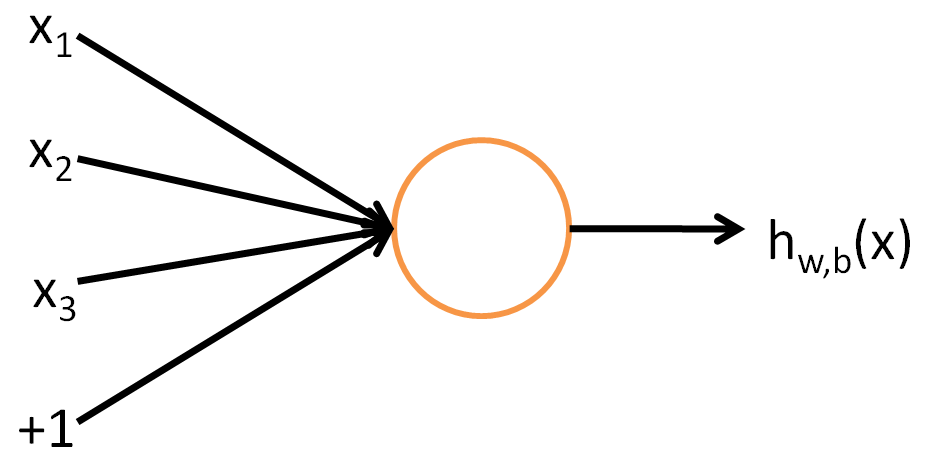


### Weight(Weights or parameters):
A weight represents the strength of the connections between units.If the weight from node 1 to node 2 has greater magnitude, it means that neuron 1 has greater influence over neuron 2. A weight brings down the importance of the input value. Weight near zero means changing this input will not change the output. Negative weights mean increasing this input will decrease the output. A weight decides how much influence the input will have on the output.  
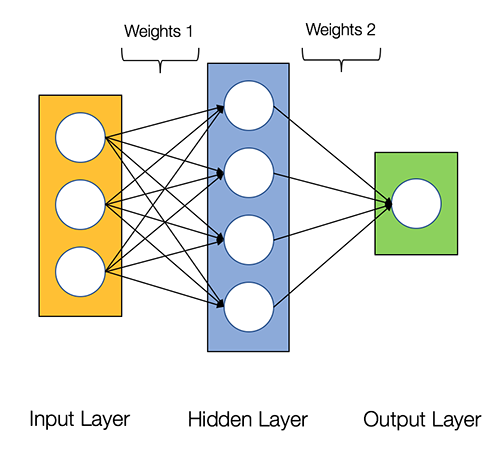

### Activation Function:

Activation functions(Transfer functions) are used to introduce non-linearity to neural networks. It squashes the values in a smaller range viz a Sigmoid activation squashes values between a range 0 and 1. There are many activation functions used in deep learning field and ReLU, SeLU, and TanH are preferred over sigmoid function. 

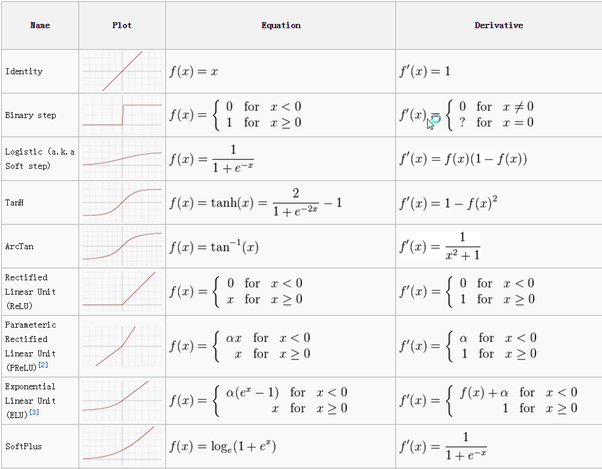

### Node Map:
Node map is like a flow chart in that it shows the path from inputs to outputs. They are usually color coded and help us understand at a very high level, some of the difference in architecture between kinds of neural networks. It's a visual digram of the architecture or 'topology' of our neural network.
### Perceptron:
Perceptron is the simplest and oldest model of neuron. It takes some inputs, sums them up, applies activation function and passes them to output layer. 
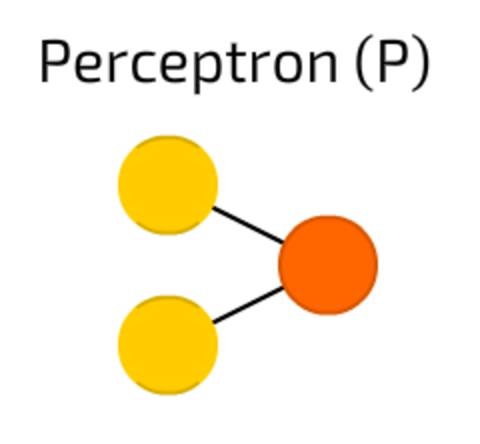

### Bias:
Bias corresponds to the intercept term. it is an extra input to neurons and it is always 1, and it has it' sown connection weight.This makes sure that even when all the inputs are none(all 0s), there is going to be an activation inthe neuron.  

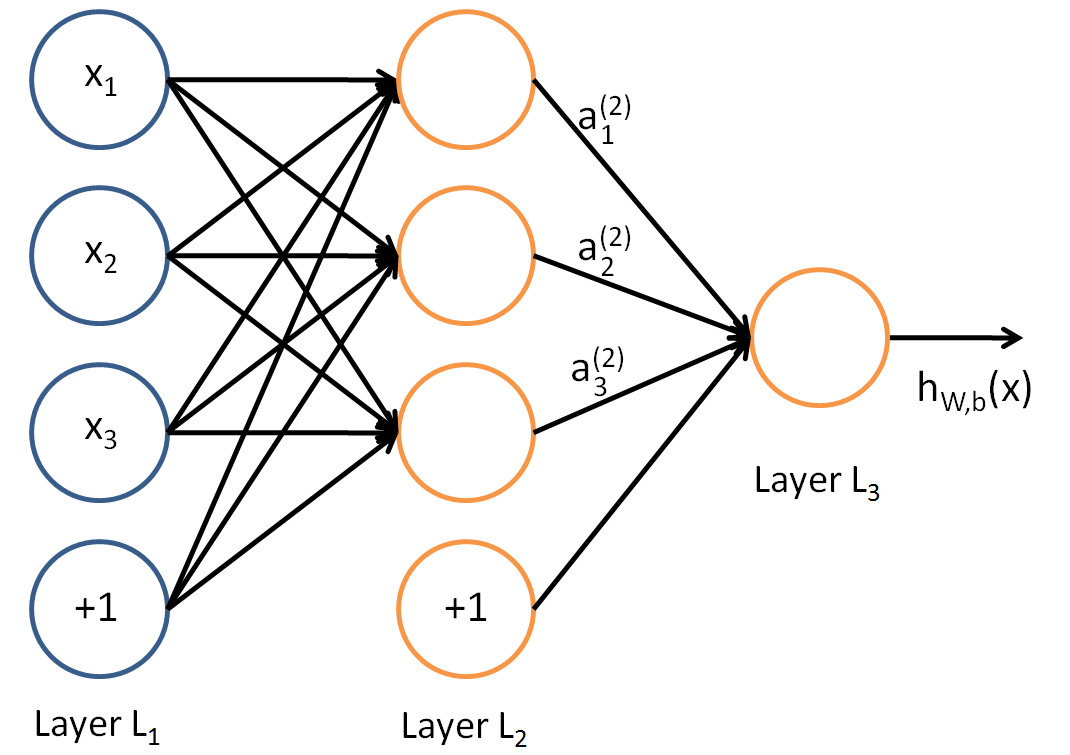

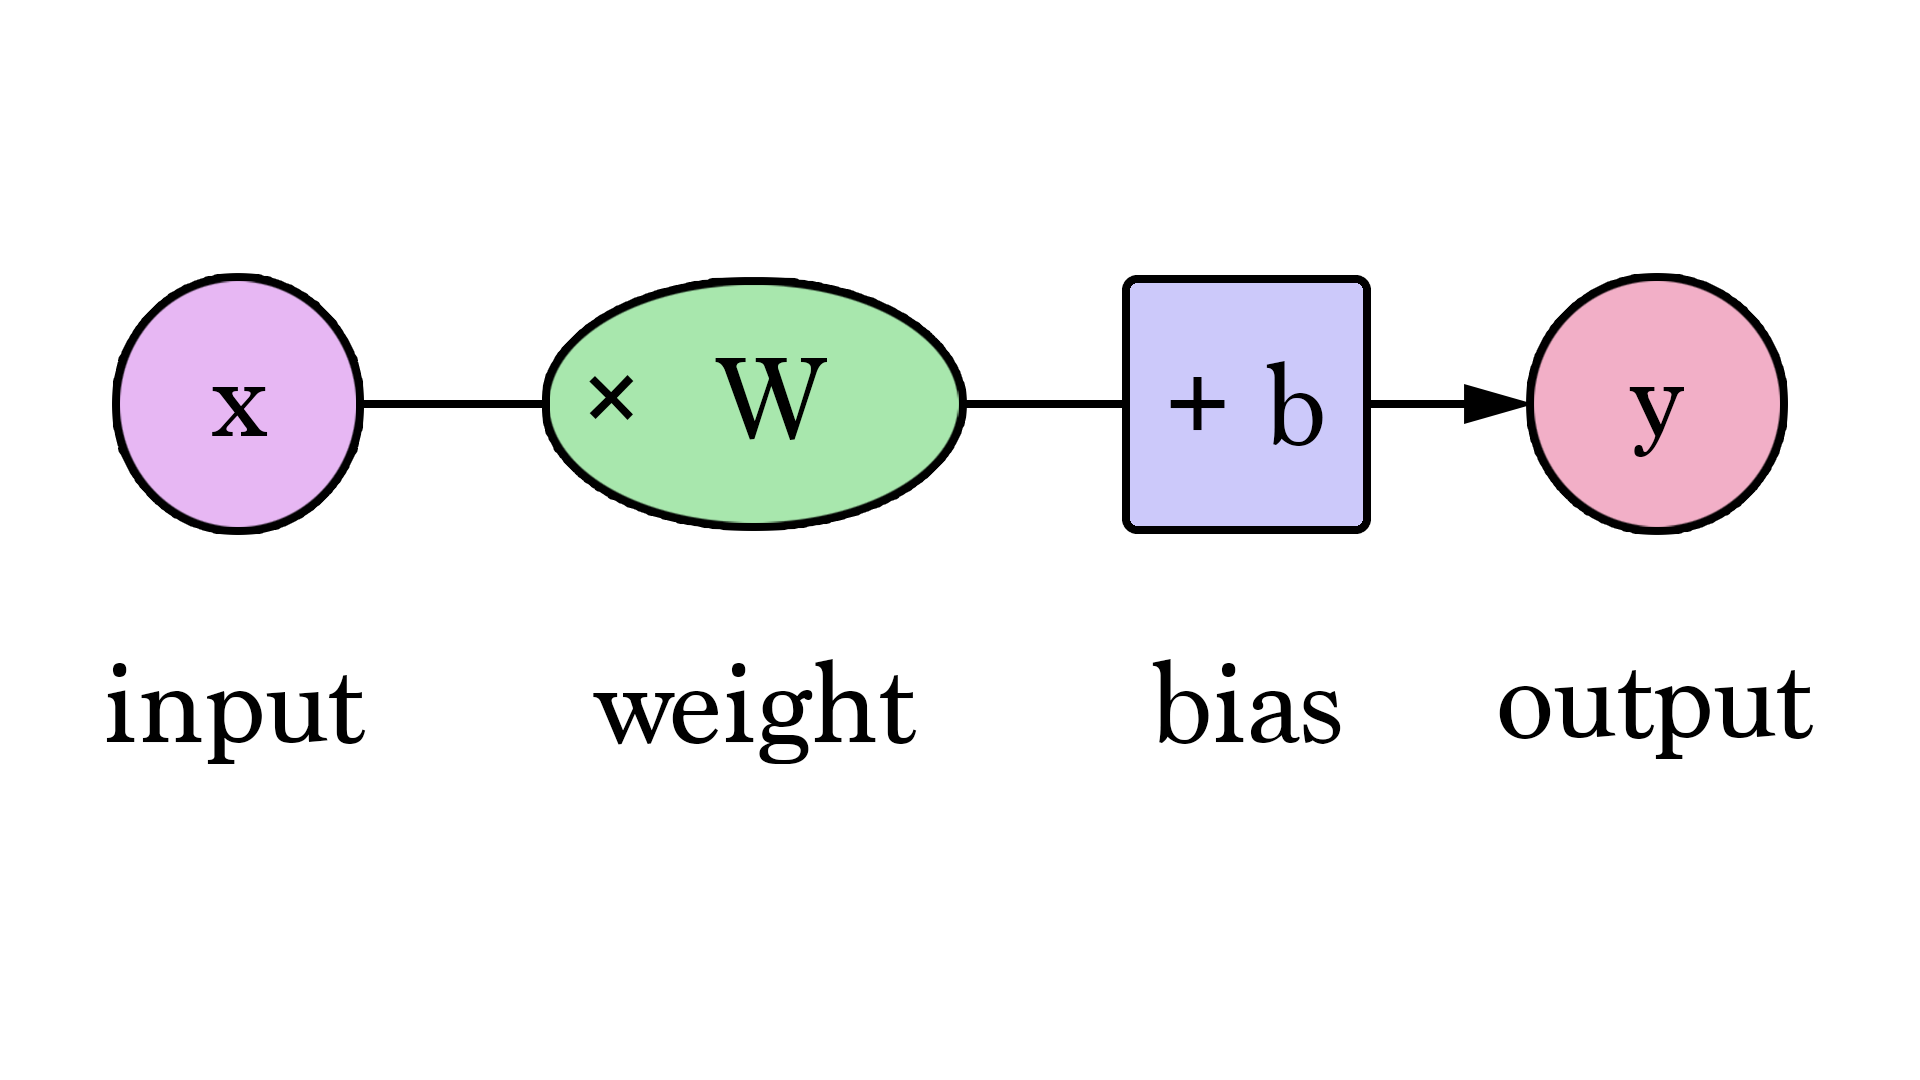

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

Neural network work flow typically starts with:

1. input layer proving inputs from the dataset plus a bias terms which represents the intercept and is typically always 1. 

2. Each input has a weight that represents it's importance.  These weights, if represented as arrows connecting input nodes (layer) to hidden layer, like a wire that has a certain amount of resistance ans only lets a certain amount of current through. 

3. Then each node has an activation function. Each node in a given layer typically has the same activation function. Activation functions are the biggest price of neural networks. The activation function then decides whether a cell fires or not depending on the weights that were passed into it. Activation functions then decide how much signal to pass onto the next layer. That's why they are sometimes referred to as transfer function because they determine how much signal is transferred to the next layer. 

4. The final layer is called the output layer. Typically the output value is modified by an activation function to transform it into a format that makes sense for our context. 


#### Your Answer Here

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [7]:
import numpy as np
np.random.seed(1)

inputs = np.array([[0,0,1],
                   [1,0,1],
                   [0,1,1],
                   [1,1,1]])

correct_ouputs = [[1],
                  [1],
                  [1],
                  [0]]

### Sigmoid activation function and its derivative for updating weights

In [10]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

### Initialize random weights for our three inputs:

In [14]:
weights = 2 * np.random.random((3,1)) -1 
weights

array([[-0.39533485],
       [-0.70648822],
       [-0.81532281]])

### Calculate weighted sum of inputs and weights

In [15]:
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[-0.81532281],
       [-1.21065767],
       [-1.52181103],
       [-1.91714588]])

### Output the activated value for the end of 1 training epoch

In [17]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.3067574 ],
       [0.22958471],
       [0.17919499],
       [0.12818018]])

### Take differnce of output and true values to calculate error

In [18]:
error = correct_ouputs - activated_output
error

array([[ 0.6932426 ],
       [ 0.77041529],
       [ 0.82080501],
       [-0.12818018]])

In [20]:
adjustments = error * sigmoid_derivative(activated_output) ### Gradient Descent /backpropagation magic
adjustments

array([[ 0.16929661],
       [ 0.19008796],
       [ 0.20356273],
       [-0.03191378]])

### update weights

In [21]:
weights += np.dot(inputs.T, adjustments)
weights

array([[-0.23716067],
       [-0.53483926],
       [-0.28428928]])

### Putting it all together

In [23]:
for interation in range(5000):
    #weighted sum of inputs and weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate with sigmoid function
    activated_output = sigmoid(weighted_sum)
    
    # Calulate error
    error = correct_ouputs - activated_output
    
    # Calculate weight adjustment with sigmoid derivative
    adjustments = error* sigmoid_derivative(activated_output)
    
    # updated weights
    weights += np.dot(inputs.T, adjustments)
    
print('optimized weights after training: ')
print(weights)

print("Output after Training:")
print(activated_output)

optimized weights after training: 
[[-10.44597988]
 [-10.44597988]
 [ 15.71858531]]
Output after Training:
[[0.99999985]
 [0.99489494]
 [0.99489494]
 [0.00563463]]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [24]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv'

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [30]:
y = df['Outcome'].values

In [58]:
y np.where(y == "0", -1,1)

SyntaxError: invalid syntax (<ipython-input-58-2a4d6e9920e0>, line 1)

In [49]:
X = df.iloc[:,[1,2]].values

In [50]:
X.shape, y.shape

((768, 2), (768,))

In [51]:
768/2

384.0

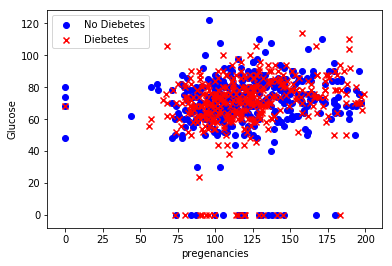

In [52]:
plt.scatter(X[:384, 0], X[:384, 1], color='blue', marker='o', label='No Diebetes')
plt.scatter(X[384:769, 0], X[384:769, 1], color='red', marker='x', label='Diebetes')
plt.xlabel('pregenancies')
plt.ylabel('Glucose')
plt.legend(loc='upper left')
plt.show()

In [59]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, 0)

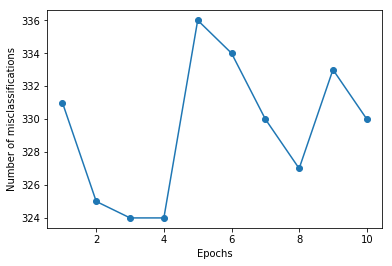

In [60]:
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [61]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    alpha=0.8, c=cmap(idx),
    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


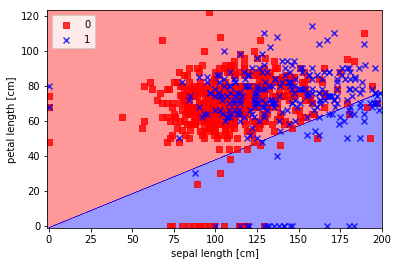

In [62]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?